# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Унру Д.В. БПИ2303
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

Граф успешно загружен.


Кратчайший путь: [0, 3, 2, 4], Расстояние: 60
Время выполнения: 0.0010 сек


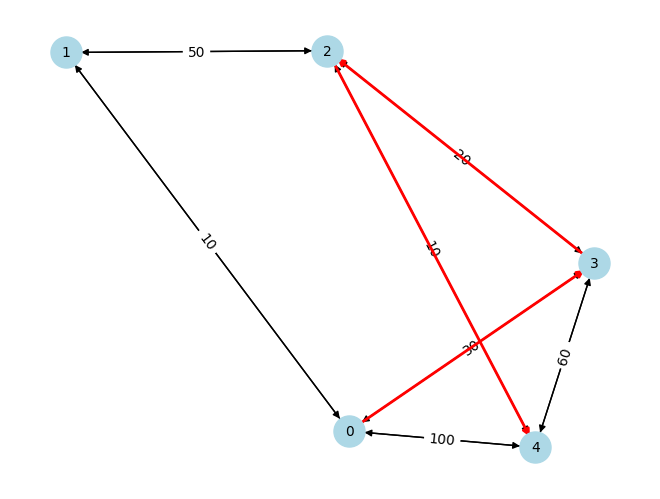

+-----------------+----------------+---------------+
|   Кол-во вершин |   Кол-во рёбер |   Время (сек) |
+=================+================+===============+
|              10 |             90 |    0          |
+-----------------+----------------+---------------+
|              50 |           2450 |    0.00105572 |
+-----------------+----------------+---------------+
|             100 |           9900 |    0          |
+-----------------+----------------+---------------+


In [ ]:
import heapq
import time
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

def dijkstra(graph, start, end):

    n = len(graph)
    distances = [float('inf')] * n
    previous = [-1] * n
    distances[start] = 0
    pq = [(0, start)]

    while pq:
        current_distance, u = heapq.heappop(pq)
        if u == end:
            break
        for v, weight in enumerate(graph[u]):
            if weight > 0:
                distance = current_distance + weight
                if distance < distances[v]:
                    distances[v] = distance
                    previous[v] = u
                    heapq.heappush(pq, (distance, v))

    path = []
    current = end
    while current != -1:
        path.append(current)
        current = previous[current]
    path.reverse()

    if path[0] != start:
        return [], float('inf')
    return path, distances[end]

def yen_algorithm(graph, start, end, k=1):

    shortest_paths = []
    potential_paths = []

    first_path, first_distance = dijkstra(graph, start, end)
    if not first_path:
        print("Путь не найден.")
        return []
    shortest_paths.append((first_path, first_distance))

    for _ in range(1, k):
        last_path, last_distance = shortest_paths[-1]
        for i in range(len(last_path) - 1):
            spur_node = last_path[i]
            root_path = last_path[:i + 1]

            graph_clone = [row[:] for row in graph]
            for path, _ in shortest_paths:
                if len(path) > i and root_path == path[:i + 1]:
                    graph_clone[path[i]][path[i + 1]] = 0

            spur_path, spur_distance = dijkstra(graph_clone, spur_node, end)
            if spur_distance < float('inf'):
                total_path = root_path[:-1] + spur_path
                total_distance = sum(graph[total_path[j]][total_path[j + 1]] for j in range(len(total_path) - 1))
                heapq.heappush(potential_paths, (total_distance, total_path))

        if not potential_paths:
            break

        next_distance, next_path = heapq.heappop(potential_paths)
        shortest_paths.append((next_path, next_distance))

    return shortest_paths

def read_graph_from_file(filename):
    try:
        with open(filename, 'r') as f:
            graph = [list(map(int, line.split())) for line in f.readlines()]
        return graph
    except FileNotFoundError:
        print(f"Ошибка: Файл '{filename}' не найден.")
        return None
    except ValueError:
        print(f"Ошибка: Неверный формат данных в файле '{filename}'.")
        return None

def visualize_graph(graph, shortest_path=None):
    G = nx.DiGraph()
    n = len(graph)
    for i in range(n):
        for j in range(n):
            if graph[i][j] > 0:
                G.add_edge(i, j, weight=graph[i][j])

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    if shortest_path:
        path_edges = list(zip(shortest_path, shortest_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.show()

def analyze_time_complexity():
    results = []
    for n in [10, 50, 100]:
        graph = [[0] * n for _ in range(n)]
        for i in range(n):
            for j in range(n):
                if i != j:
                    graph[i][j] = 1

        start_time = time.time()
        yen_algorithm(graph, 0, n - 1, k=1)
        elapsed_time = time.time() - start_time
        results.append([n, n * (n - 1), elapsed_time])

    print(tabulate(results, headers=["Кол-во вершин", "Кол-во рёбер", "Время (сек)"], tablefmt="grid"))

def main():
    file_path = r"C:\Users\User\Desktop\SIAOD_labs\Lab3\graph.txt"

    graph = read_graph_from_file(file_path)
    if graph is None:
        return
    print("Граф успешно загружен.")

    start = int(input("Введите начальную вершину: "))
    end = int(input("Введите конечную вершину: "))

    start_time = time.time()
    shortest_paths = yen_algorithm(graph, start, end, k=1)
    elapsed_time = time.time() - start_time

    if shortest_paths:
        shortest_path, shortest_distance = shortest_paths[0]
        print(f"Кратчайший путь: {shortest_path}, Расстояние: {shortest_distance}")
        print(f"Время выполнения: {elapsed_time:.4f} сек")

        visualize_graph(graph, shortest_path)
    else:
        print("Путь не найден.")

    analyze_time_complexity()

if __name__ == "__main__":
    main()